## (MNIST Project part1)

### Classification

## Get tha dataset

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### exploring and preparing the dataset

#### print your dataset to get insight

In [ ]:
mnist

#### Split you data into data and labels (target)

In [ ]:
X, y = mnist["data"], mnist["target"]

#### find the data shape using .shape function

In [ ]:
X.shape

(70000, 784)

### Peek at one digit from the dataset

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

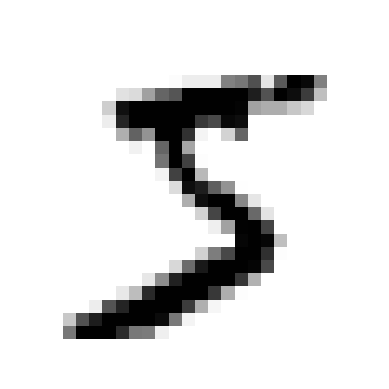

In [ ]:
import matplotlib
def plot_digit(image_data):
 image = image_data.reshape(28, 28)
 plt.imshow(image, cmap="binary")
 plt.axis("off")
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [ ]:
y[0]

'5'

#### Split the data into train and test set

In [ ]:
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Shuffling the training set

In [ ]:
#hint shuffle-vs-permutation-numpy
shuffle_index = np.random.permutation(60000) #randomize the data before i start working with it
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#### access the label of the above digit image

In [ ]:
y_train[0]

'3'

### Training a <font color= red>Binary</font> classifier


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### SGD classifier

#### Create a SGD classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

## Performance measure

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(sgd_clf, X_train,y_train_5,cv=3,scoring="accuracy")

array([0.96295, 0.9377 , 0.96205])

#### Try a dumb classifier

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

In [ ]:
print(any(dummy_clf.predict(X_train)))

False


#### find cross_val_score for the dumb classifier

In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

## Confusion matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### try to find confusion matrix

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53073,  1506],
       [ 1240,  4181]])

####  try perfect classifier which will have only true positives and true negative


In [ ]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [ ]:
precision_score(y_train_5, y_train_pred)

0.7351855108141375

#### find recall score

In [ ]:
recall_score(y_train_5, y_train_pred)

0.7712599151448072

#### find f1 score
***Notice that f1 score is harmonic mean between recall and precision***

In [ ]:
f1_score(y_train_5, y_train_pred)

0.7527907814187973

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([3414.78562254])

#### Set the threshold to zero

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

#### Set the threshold to 200000

In [ ]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

#### To decide which threshold you want to use find decision scores for all instances

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

#### computing precision and recall for all possible thresholds using the precision_recall_curve()

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

#### plot precision and recall as functions of the threshold value using Matplotlib

<Figure size 1000x500 with 0 Axes>

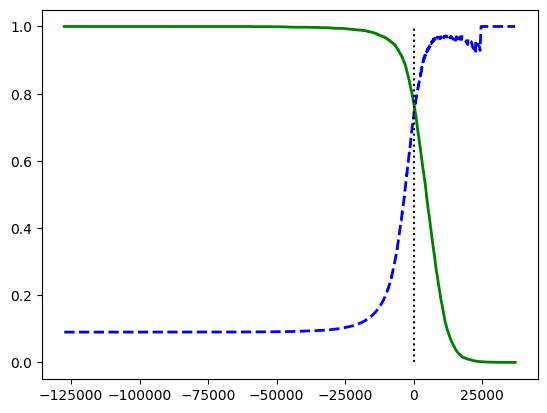

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--",
label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall",
linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted",
label="threshold")
[...]
plt.figure(figsize=(10,5))

#### lets aim for 90%recall
#### try different threshold and see what will happen

#### precision score

In [ ]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9

#### recall score

In [ ]:
recall_at_90_precision = recall_score(y_train_5,y_train_pred_90)
recall_at_90_precision

0.5694521306032098

# The ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#### plot the FPR against the TPR using Matplotlib

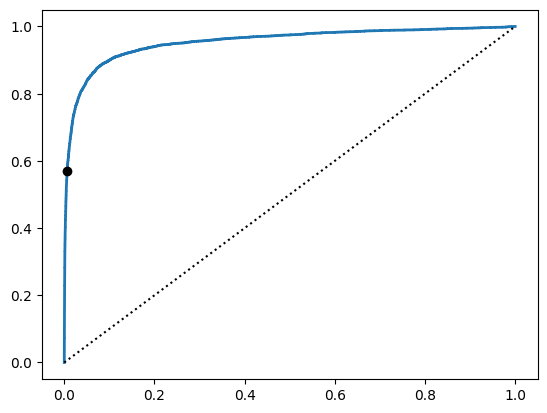

In [ ]:
idx_for_threshold_at_90 = (thresholds <=
threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
[...] # beautify the figure: add labels, grid, legend, arrow, and text
plt.show()


#### computing the ROC AUC score

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9542280910017811

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_clf = RandomForestClassifier(random_state=42)

#### try to plot ROC
***Notice that you will need scores not probabilities***

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest[:2]

#### find ROC AUC score for randomforestclassifier

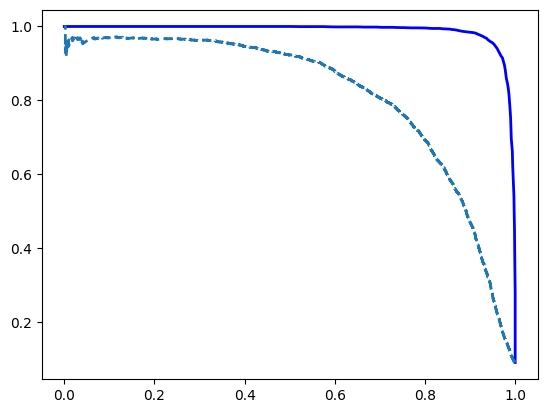

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)
plt.plot(recalls_forest, precisions_forest, "b-",
linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
[...] # beautify the figure: add labels, grid, andlegend
plt.show()
